In [52]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('2023_06_29.csv', sep=';')

### I need bid/ask price and size
df = df[['Time','BidPrice', 'BidSize', 'AskPrice', 'AskSize']]
df["Datetime"] = pd.to_datetime(df["Time"], format="%H:%M:%S.%f")
########## sort by time ##########
df = df.sort_values("Datetime").reset_index(drop=True)

df.head()

,Time,BidPrice,BidSize,AskPrice,AskSize,Datetime
0,13:30:00.000,4413.75,57,4414.00,41,1900-01-01 13:30:00.000000
1,13:30:00.001,4413.75,57,4414.00,41,1900-01-01 13:30:00.001000
2,13:30:00.1000,4413.75,59,4414.00,32,1900-01-01 13:30:00.100000
3,13:30:00.10000,4413.50,63,4413.75,1,1900-01-01 13:30:00.100000
4,13:30:00.1001,4413.75,59,4414.00,32,1900-01-01 13:30:00.100100


In [54]:
# Size-weighted mid per your formula:
# p = (r*a + q*b) / (r + q)  with r=BidSize, q=AskSize
num = df["BidSize"] * df["AskPrice"] + df["AskSize"] * df["BidPrice"]
den = df["BidSize"] + df["AskSize"]
df["Mid_price"] = np.where(den > 0, num / den, np.nan)


# Log-size-weighted mid per your formula:
df["BidPrice_log"] = np.log(df["BidPrice"])
df["AskPrice_log"] = np.log(df["AskPrice"])
df["BidSize_log"]  = np.log(df["BidSize"].replace(0, np.nan))
df["AskSize_log"]  = np.log(df["AskSize"].replace(0, np.nan))

num_log = df["BidSize_log"] * df["AskPrice_log"] + df["AskSize_log"] * df["BidPrice_log"]
den_log = df["BidSize_log"] + df["AskSize_log"]
df["Mid_price_log"] = np.where(den > 0, np.log(num_log) - np.log(den_log), np.nan)

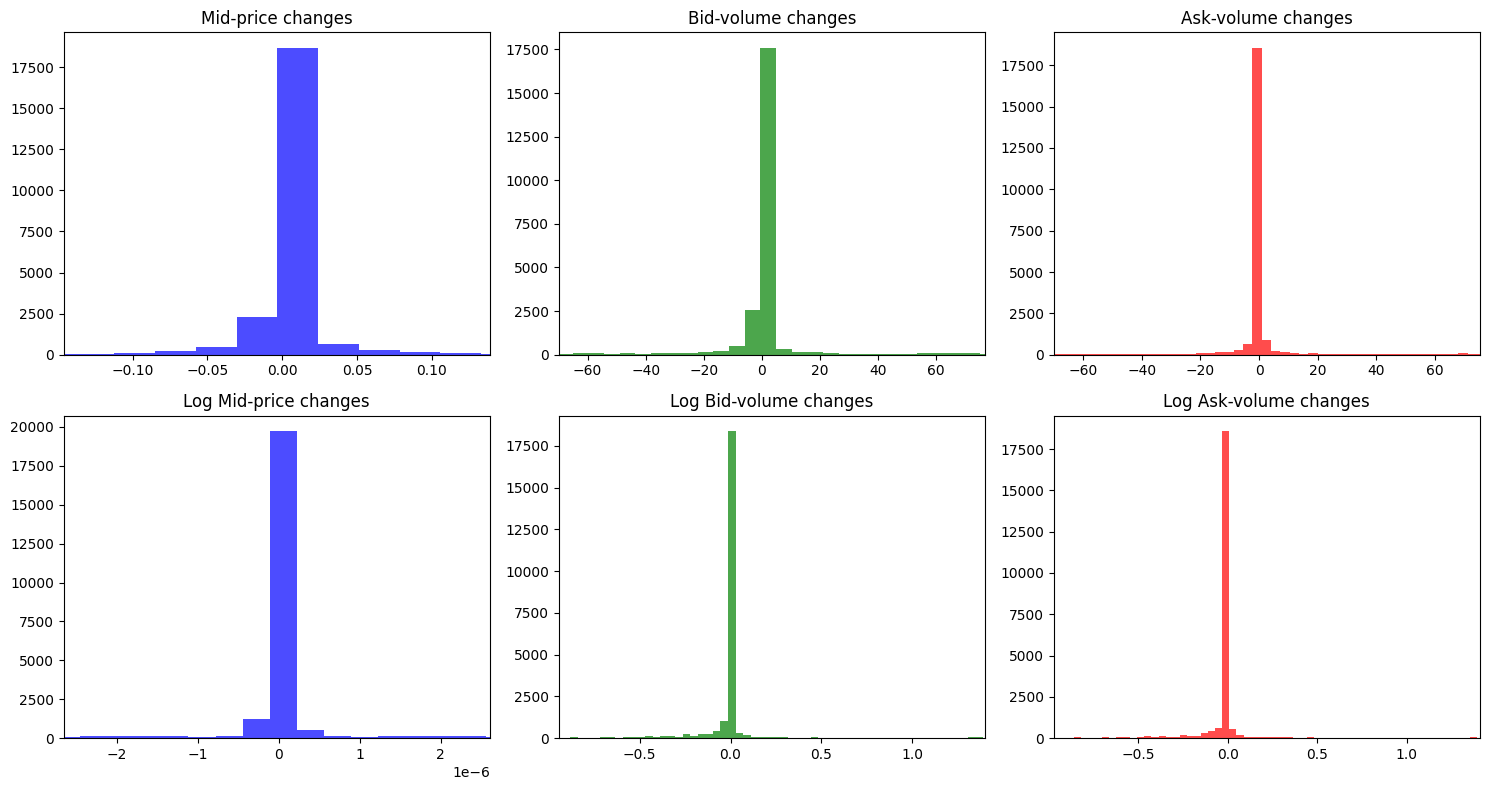

In [64]:
################ Frequncy Distribution in mid-price, ask/bid price and log(mid-price), log(ask/bid price) #################
import matplotlib.pyplot as plt
# --- Tick-to-tick changes ---
df["Mid_change"] = df["Mid_price"].diff()
df["BidVol_change"] = df["BidSize"].diff()
df["AskVol_change"] = df["AskSize"].diff()

# --- Log transforms ---
df["LogMid"] = np.log(df["Mid_price_log"])
df["LogBidVol"] = np.log(df["BidSize_log"].replace(0, np.nan))
df["LogAskVol"] = np.log(df["AskSize_log"].replace(0, np.nan))

# Log changes
df["LogMid_change"] = df["LogMid"].diff()
df["LogBidVol_change"] = df["LogBidVol"].diff()
df["LogAskVol_change"] = df["LogAskVol"].diff()

# --- Drop NA from first diff ---
df = df.dropna()

# --- Helper to set x-limits based on percentiles ---
def set_xlim_percentile(ax, data, q=0.99):
    low, high = data.quantile([1-q, q])
    ax.set_xlim(low, high)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Linear scale
axes[0,0].hist(df["Mid_change"], bins=100, color="blue", alpha=0.7)
axes[0,0].set_title("Mid-price changes")
set_xlim_percentile(axes[0,0], df["Mid_change"])

axes[0,1].hist(df["BidVol_change"], bins=100, color="green", alpha=0.7)
axes[0,1].set_title("Bid-volume changes")
set_xlim_percentile(axes[0,1], df["BidVol_change"])

axes[0,2].hist(df["AskVol_change"], bins=100, color="red", alpha=0.7)
axes[0,2].set_title("Ask-volume changes")
set_xlim_percentile(axes[0,2], df["AskVol_change"])

# Log scale
axes[1,0].hist(df["LogMid_change"], bins=100, color="blue", alpha=0.7)
axes[1,0].set_title("Log Mid-price changes")
set_xlim_percentile(axes[1,0], df["LogMid_change"])

axes[1,1].hist(df["LogBidVol_change"], bins=100, color="green", alpha=0.7)
axes[1,1].set_title("Log Bid-volume changes")
set_xlim_percentile(axes[1,1], df["LogBidVol_change"])

axes[1,2].hist(df["LogAskVol_change"], bins=100, color="red", alpha=0.7)
axes[1,2].set_title("Log Ask-volume changes")
set_xlim_percentile(axes[1,2], df["LogAskVol_change"])

plt.tight_layout()
plt.show()


In [65]:
df.head(20)

,Time,BidPrice,BidSize,AskPrice,AskSize,Datetime,Mid_price,BidPrice_log,AskPrice_log,BidSize_log,...,OFITick_log,Mid_change,BidVol_change,AskVol_change,LogMid,LogBidVol,LogAskVol,LogMid_change,LogBidVol_change,LogAskVol_change
8,13:30:00.1005,4413.75,56,4414.00,32,1900-01-01 13:30:00.100500,4413.909091,8.392480,8.392537,4.025352,...,0.000000,0.000000,0.0,0.0,0.754872,1.392612,1.242925,0.000000e+00,0.000000,0.000000
9,13:30:00.103000,4413.50,63,4414.00,114,1900-01-01 13:30:00.103000,4413.677966,8.392423,8.392537,4.143135,...,-5.295814,-0.231125,7.0,82.0,0.754870,1.421453,1.555235,-1.916701e-06,0.028840,0.312310
10,13:30:00.105000,4413.50,61,4414.00,114,1900-01-01 13:30:00.105000,4413.674286,8.392423,8.392537,4.110874,...,-0.032261,-0.003680,-2.0,0.0,0.754870,1.413636,1.555235,-1.234133e-08,-0.007817,0.000000
11,13:30:00.105001,4413.50,60,4414.00,114,1900-01-01 13:30:00.105001,4413.672414,8.392423,8.392537,4.094345,...,-0.016529,-0.001872,-1.0,0.0,0.754870,1.409607,1.555235,-6.358191e-09,-0.004029,0.000000
12,13:30:00.11000,4413.50,63,4414.00,62,1900-01-01 13:30:00.110000,4413.752000,8.392423,8.392537,4.143135,...,0.657854,0.079586,3.0,-52.0,0.754871,1.421453,1.417583,2.367354e-07,0.011846,-0.137651
15,13:30:00.111001,4413.50,65,4414.00,113,1900-01-01 13:30:00.111001,4413.682584,8.392423,8.392537,4.174387,...,0.000000,-0.069416,2.0,51.0,0.754870,1.428968,1.553373,-2.032235e-07,0.007515,0.135789
16,13:30:00.111002,4413.50,65,4414.00,113,1900-01-01 13:30:00.111002,4413.682584,8.392423,8.392537,4.174387,...,0.000000,0.000000,0.0,0.0,0.754870,1.428968,1.553373,0.000000e+00,0.000000,0.000000
17,13:30:00.111003,4413.50,65,4414.00,113,1900-01-01 13:30:00.111003,4413.682584,8.392423,8.392537,4.174387,...,0.000000,0.000000,0.0,0.0,0.754870,1.428968,1.553373,0.000000e+00,0.000000,0.000000
18,13:30:00.111004,4413.50,65,4414.00,113,1900-01-01 13:30:00.111004,4413.682584,8.392423,8.392537,4.174387,...,0.000000,0.000000,0.0,0.0,0.754870,1.428968,1.553373,0.000000e+00,0.000000,0.000000
19,13:30:00.111005,4413.50,65,4414.00,113,1900-01-01 13:30:00.111005,4413.682584,8.392423,8.392537,4.174387,...,0.000000,0.000000,0.0,0.0,0.754870,1.428968,1.553373,0.000000e+00,0.000000,0.000000


In [66]:
############################## Calculating OFI(Order flow imbalance) ##############################
# Shift previous values
df["BidPrice_prev"] = df["BidPrice"].shift(1)
df["AskPrice_prev"] = df["AskPrice"].shift(1)
df["BidSize_prev"] = df["BidSize"].shift(1)
df["AskSize_prev"] = df["AskSize"].shift(1)

# ---- ΔW calculation ----
conditions_w = [
    df["BidPrice"] > df["BidPrice_prev"],
    df["BidPrice"] == df["BidPrice_prev"],
    df["BidPrice"] < df["BidPrice_prev"]
]
choices_w = [
    df["BidSize"],
    df["BidSize"] - df["BidSize_prev"],
    -df["BidSize_prev"]
]
df["DeltaW"] = pd.Series(pd.Series(choices_w[i] for i, cond in enumerate(conditions_w)))

df["DeltaW"] = pd.Series(np.select(conditions_w, choices_w, default=0))

# ---- ΔV calculation ----
conditions_v = [
    df["AskPrice"] > df["AskPrice_prev"],
    df["AskPrice"] == df["AskPrice_prev"],
    df["AskPrice"] < df["AskPrice_prev"]
]
choices_v = [
    -df["AskSize_prev"],
    df["AskSize"] - df["AskSize_prev"],
    df["AskSize"]
]
df["DeltaV"] = pd.Series(np.select(conditions_v, choices_v, default=0))

# ---- OFITick ----
df["OFITick"] = df["DeltaW"] - df["DeltaV"]

# ---- Aggregate to interval (e.g., 100 millisecond) ----
df["Datetime"] = pd.to_datetime(df["Datetime"])
sum_OFI = df.resample("100ms", on="Datetime")["OFITick"].sum()

# Save results
df.to_csv("ofi_ticks.csv", index=False)
sum_OFI.to_csv("sum_OFI.csv")

In [67]:
############# log-OFI #############
# ---- Convert prices & volumes to logarithmic scale ----
df["BidPrice_log"] = np.log(df["BidPrice"])
df["AskPrice_log"] = np.log(df["AskPrice"])
df["BidSize_log"]  = np.log(df["BidSize"].replace(0, np.nan))
df["AskSize_log"]  = np.log(df["AskSize"].replace(0, np.nan))

# Shift previous values (log prices + volumes)
df["BidPrice_prev"] = df["BidPrice_log"].shift(1)
df["AskPrice_prev"] = df["AskPrice_log"].shift(1)
df["BidSize_prev"]  = df["BidSize_log"].shift(1)
df["AskSize_prev"]  = df["AskSize_log"].shift(1)

# ---- ΔW calculation ----
conditions_w = [
    df["BidPrice_log"] > df["BidPrice_prev"],
    df["BidPrice_log"] == df["BidPrice_prev"],
    df["BidPrice_log"] < df["BidPrice_prev"]
]
choices_w = [
    df["BidSize_log"],
    df["BidSize_log"] - df["BidSize_prev"],
    -df["BidSize_prev"]
]
df["DeltaW"] = np.select(conditions_w, choices_w, default=0)

# ---- ΔV calculation ----
conditions_v = [
    df["AskPrice_log"] > df["AskPrice_prev"],
    df["AskPrice_log"] == df["AskPrice_prev"],
    df["AskPrice_log"] < df["AskPrice_prev"]
]
choices_v = [
    -df["AskSize_prev"],
    df["AskSize_log"] - df["AskSize_prev"],
    df["AskSize_log"]
]
df["DeltaV"] = np.select(conditions_v, choices_v, default=0)

# ---- OFITick ----
df["OFITick_log"] = df["DeltaW"] - df["DeltaV"]

# ---- Aggregate to interval (e.g., 100 millisecond) ----
df["Datetime"] = pd.to_datetime(df["Datetime"])
sum_OFI_log = df.resample("100ms", on="Datetime")["OFITick_log"].sum().reset_index()

# ---- Save results ----
df.to_csv("ofi_ticks_log.csv", index=False)
sum_OFI_log.to_csv("sum_OFI_log.csv", index=False)


In [69]:
################# Now I have sum_OFI/sum_OFLI_log and mid_price/log_mid_price in every 100 ms interval #################

# Load both files
ofi = pd.read_csv("sum_OFI.csv", parse_dates=["Datetime"])
ofi_log = pd.read_csv("sum_OFI_log.csv", parse_dates=["Datetime"])

# Merge on Datetime
merged = pd.merge(ofi, ofi_log, on="Datetime", how="inner", suffixes=("", "_log"))

# Save merged file
merged.to_csv("merged_OFI.csv", index=False)

print(merged.head())


                 Datetime  OFITick  OFITick_log
0 1900-01-01 13:30:00.100     -6.0    -3.989698
1 1900-01-01 13:30:00.200     19.0    -5.909787
2 1900-01-01 13:30:00.300   -260.0   -14.109895
3 1900-01-01 13:30:00.400     95.0    15.367084
4 1900-01-01 13:30:00.500   -189.0   -31.085653


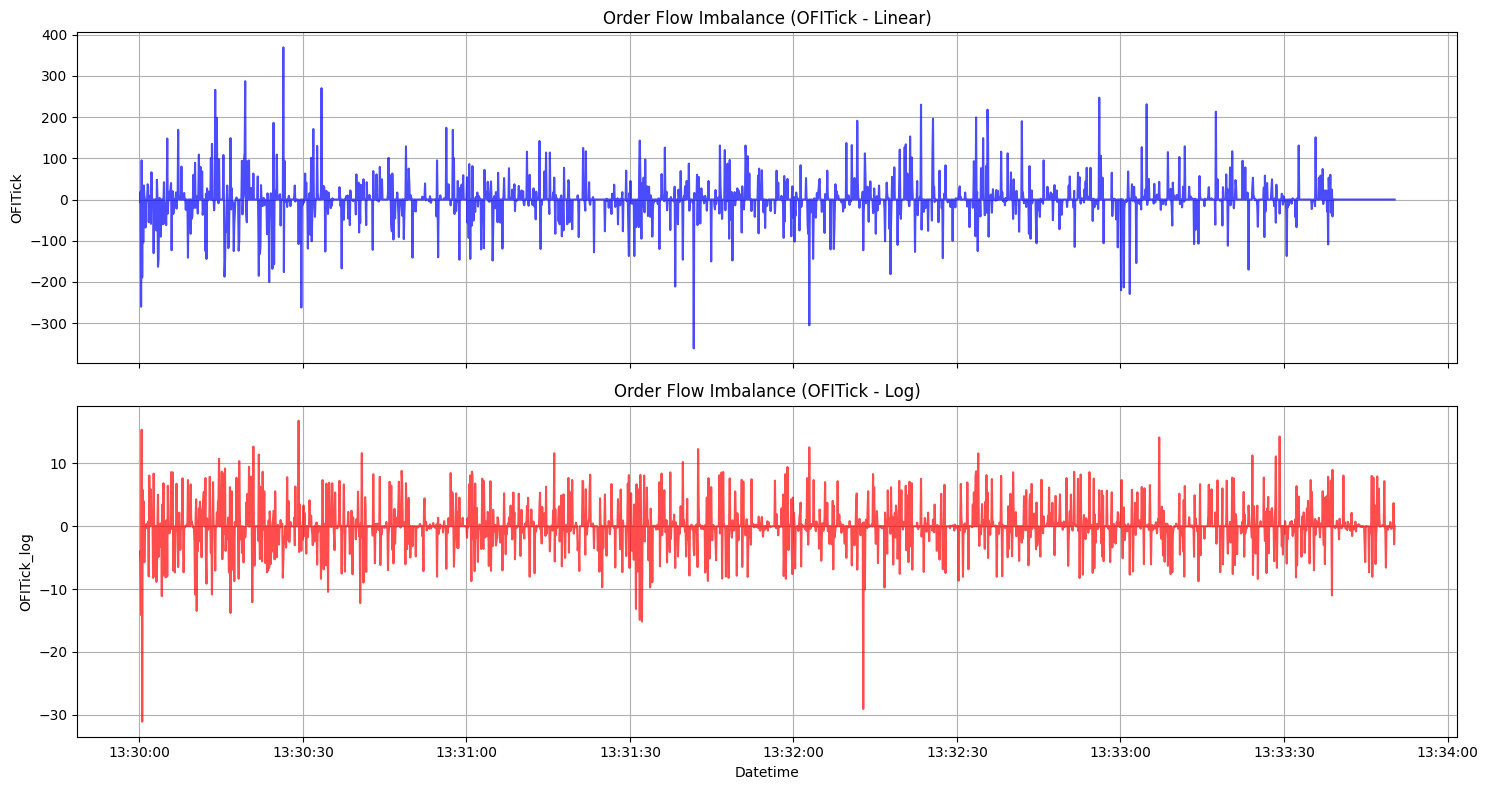

In [ ]:

##################### You can see how OFI and OFI_log vary with time #####################
merged = pd.read_csv("merged_OFI.csv", parse_dates=["Datetime"])

# Create two subplots (stacked vertically)
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# --- Plot OFITick ---
axes[0].plot(merged["Datetime"], merged["OFITick"], color="blue", alpha=0.7)
axes[0].set_title("Order Flow Imbalance (OFITick - Linear)")
axes[0].set_ylabel("OFITick")
axes[0].grid(True)

# --- Plot OFITick_log ---
axes[1].plot(merged["Datetime"], merged["OFITick_log"], color="red", alpha=0.7)
axes[1].set_title("Order Flow Imbalance (OFITick - Log)")
axes[1].set_ylabel("OFITick_log")
axes[1].set_xlabel("Datetime")
axes[1].grid(True)

plt.tight_layout()
plt.show()

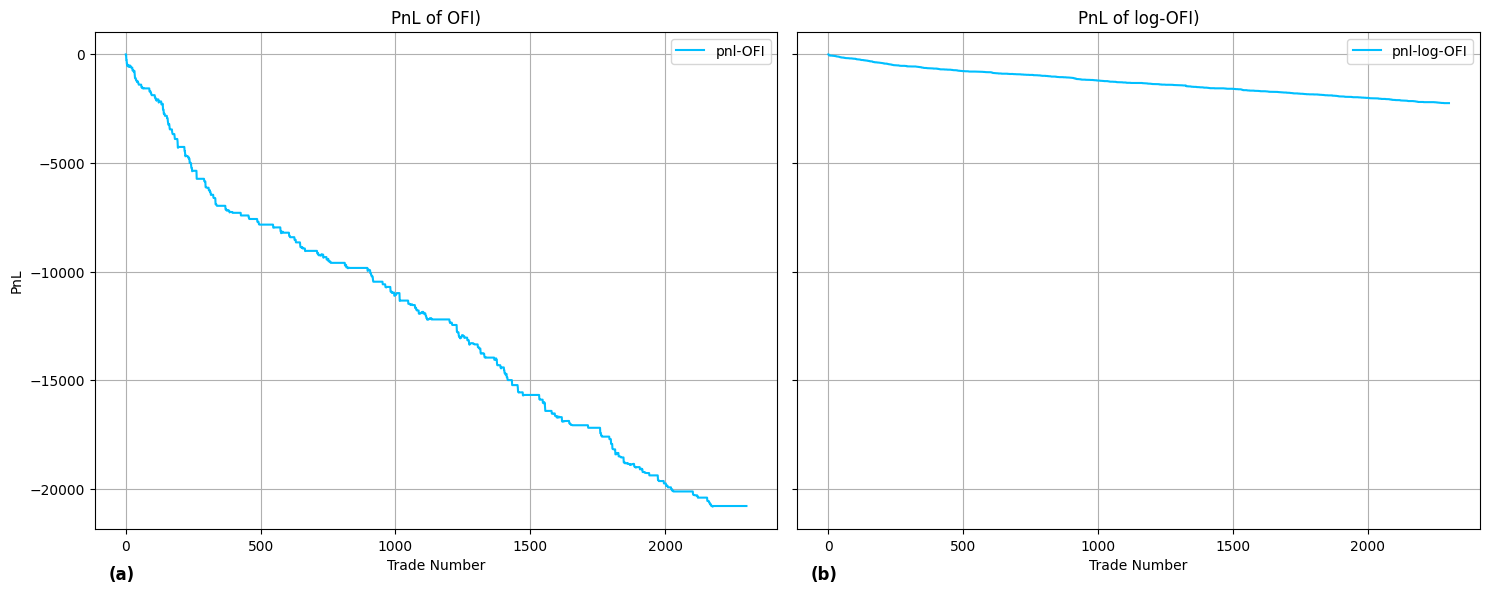

In [79]:
# ===============================
# 2. Strategy Implementation
# ===============================

def backtest_strategy(signal, upper_open, lower_open, upper_close, lower_close):
    """
    Simple backtest:
    - Open position when signal crosses thresholds
    - Close when return to close bounds
    - Long = +1, Short = -1
    """
    position = 0
    pnl = []
    entry_price = 0  # Not actual price, just signal reference

    for s in signal:
        # --- Entry rules ---
        if position == 0:
            if s > upper_open:
                position = -1  # Short
            elif s < lower_open:
                position = 1   # Long

        # --- Exit rules ---
        elif position == 1:  # Long
            if s > upper_close:
                position = 0
        elif position == -1:  # Short
            if s < lower_close:
                position = 0

        # --- PnL = signal * position ---
        pnl.append(position * s)

    return np.cumsum(pnl)  # Cumulative PnL

# OFI strategy (thresholds 300/150)
df["CumPnL_OFI"] = backtest_strategy(df["OFITick"], 
                                     upper_open=100, lower_open=-100, 
                                     upper_close=50, lower_close=-50)

# log-OFI strategy (thresholds 24/12)
df["CumPnL_logOFI"] = backtest_strategy(df["OFITick_log"], 
                                        upper_open=4, lower_open=-4, 
                                        upper_close=2, lower_close=-2)

# ===============================
# 3. Plot PnL (side-by-side)
# ===============================
fig, axes = plt.subplots(1, 2, figsize=(15,6), sharey=True)

# (a) OFI
axes[0].plot(df.index, df["CumPnL_OFI"], label="pnl-OFI", color="deepskyblue")
axes[0].set_title("PnL of OFI)")
axes[0].set_xlabel("Trade Number")
axes[0].set_ylabel("PnL")
axes[0].legend()
axes[0].grid(True)
axes[0].text(0.02, -0.1, "(a)", transform=axes[0].transAxes, fontsize=12, fontweight="bold")

# (b) log-OFI
axes[1].plot(df.index, df["CumPnL_logOFI"], label="pnl-log-OFI", color="deepskyblue")
axes[1].set_title("PnL of log-OFI)")
axes[1].set_xlabel("Trade Number")
axes[1].legend()
axes[1].grid(True)
axes[1].text(0.02, -0.1, "(b)", transform=axes[1].transAxes, fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()